# MNIST (Simple)

In [79]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy
import sys
import os
import tensorflow as tf

# set seed 
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [80]:
# load MNIST Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("# of training images : %d " % (X_train.shape[0]))
print("# of testing images : %d " % (X_test.shape[0]))

# of training images : 60000 
# of testing images : 10000 


In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [82]:
Y_train.shape

(60000,)

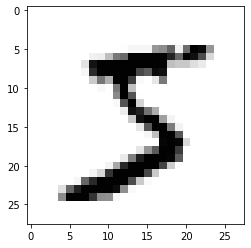

In [83]:
# Visual check
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [84]:
# Code No Check
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [85]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [51]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [86]:
# class No value check
print("class : %d " % (Y_train[0]))

class : 5 


In [87]:
# One - Hot Encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# print(y_train[0])
Y_train.shape

In [91]:
# Build Model (Simple)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [92]:
# Model parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [93]:
# Training
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# Accuracy
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15141, saving model to ./model\01-0.1514.hdf5

Epoch 00002: val_loss improved from 0.15141 to 0.10509, saving model to ./model\02-0.1051.hdf5

Epoch 00003: val_loss improved from 0.10509 to 0.08067, saving model to ./model\03-0.0807.hdf5

Epoch 00004: val_loss improved from 0.08067 to 0.07738, saving model to ./model\04-0.0774.hdf5

Epoch 00005: val_loss improved from 0.07738 to 0.06794, saving model to ./model\05-0.0679.hdf5

Epoch 00006: val_loss improved from 0.06794 to 0.06584, saving model to ./model\06-0.0658.hdf5

Epoch 00007: val_loss improved from 0.06584 to 0.06303, saving model to ./model\07-0.0630.hdf5

Epoch 00008: val_loss did not improve from 0.06303

Epoch 00009: val_loss improved from 0.06303 to 0.06131, saving model to ./model\09-0.0613.hdf5

Epoch 00010: val_loss did not improve from 0.06131

Epoch 00011: val_loss did not improve from 0.06131

Epoch 00012: val_loss did not improve from 0.06131
313/313 [===================

In [72]:
# Test Loss
y_vloss = history.history['val_loss']

In [73]:
y_vloss

[0.15141184628009796,
 0.10508543998003006,
 0.08067195117473602,
 0.07737606018781662,
 0.06794262677431107,
 0.06584016978740692,
 0.0630340576171875,
 0.06553047150373459,
 0.0613052137196064,
 0.06419933587312698,
 0.06263051927089691,
 0.06689702719449997,
 0.06303255259990692,
 0.06354296207427979,
 0.062238823622465134,
 0.07480233907699585,
 0.08101486414670944,
 0.06804490089416504,
 0.07043122500181198]

In [63]:
# Train Loss
y_loss = history.history['loss']

In [64]:
y_loss

[0.30191582441329956,
 0.12504953145980835,
 0.08148521929979324,
 0.05840423330664635,
 0.04500669613480568,
 0.03394630551338196,
 0.02545815519988537,
 0.019814003258943558,
 0.014428107999265194,
 0.011991948820650578,
 0.009579969570040703,
 0.006573781371116638,
 0.004951903596520424,
 0.004329117015004158,
 0.0031558407936245203,
 0.0034500397741794586,
 0.009509565308690071]

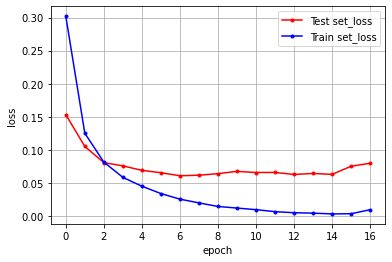

In [67]:
# Visualize
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Test set_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train set_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## MNIST (Deep)

In [2]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy
import sys
import os
import tensorflow as tf

# set seed 
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\U

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [5]:
# Build Model (Deep)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Training
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# Accuracy
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05721, saving model to ./model\01-0.0572.hdf5

Epoch 00002: val_loss improved from 0.05721 to 0.04122, saving model to ./model\02-0.0412.hdf5

Epoch 00003: val_loss improved from 0.04122 to 0.03531, saving model to ./model\03-0.0353.hdf5

Epoch 00004: val_loss improved from 0.03531 to 0.03311, saving model to ./model\04-0.0331.hdf5

Epoch 00005: val_loss improved from 0.03311 to 0.02918, saving model to ./model\05-0.0292.hdf5

Epoch 00006: val_loss improved from 0.02918 to 0.02905, saving model to ./model\06-0.0291.hdf5

Epoch 00007: val_loss improved from 0.02905 to 0.02770, saving model to ./model\07-0.0277.hdf5

Epoch 00008: val_loss did not improve from 0.02770

Epoch 00009: val_loss did not improve from 0.02770

Epoch 00010: val_loss did not improve from 0.02770

Epoch 00011: val_loss did not improve from 0.02770

Epoch 00012: val_loss did not improve from 0.02770

Epoch 00013: val_loss did not improve from 0.02770

Epoch 00014: val_lo

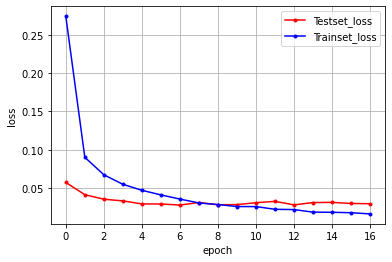

In [8]:

import matplotlib.pyplot as plt
# Val_loss
y_vloss = history.history['val_loss']

# Train Loss
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()